# 🧪 TP – Analyse des performances d’étudiants

🎯 **Objectif :** Préparer ce dataset pour un prochain cours qui prédira la note finale d’un étudiant.

### Jeu de données : StudentsPerformance.csv
### Réponder aux questions dans la cellule suivant la question
### Modules autorisés : pandas, mathplotlib, numpy, seaborn, scikit-learn

## 📋 Questions

### 🔹 0. charger le jeu de données et ajout de colonne average_score

a. Charger le jeu de données et puis ajouter une colonne 'average_score' (moyenne des trois notes "math score","reading score","writing score" dans le jeu de données

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('StudentsPerformance.csv')
df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

df.to_csv('StudentsPerformanceWithMean.csv', index=False)


### 🔹 1. Exploration de base

a. Charger le jeu de données et Afficher les 10 premières lignes du dataset

In [2]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
5,female,group B,associate's degree,standard,none,71,83,78,77.333333
6,female,group B,some college,standard,completed,88,95,92,91.666667
7,male,group B,some college,free/reduced,none,40,43,39,40.666667
8,male,group D,high school,free/reduced,completed,64,64,67,65.000000
9,female,group B,high school,free/reduced,none,38,60,50,49.333333


b. Combien d’étudiants ont participé à l’étude ?

In [3]:
print("Nombre de ligne",df.shape[0])

Nombre de ligne 1000


c. Existe-t-il des doublons (étudiants) ?

In [4]:
# Vérifie les doublons en considérant toutes les colonnes
print("Nombre de doublons (toutes colonnes):", df.duplicated().sum())

# Affiche les lignes dupliquées avec toutes leurs colonnes
duplicated_rows = df[df.duplicated(keep='first')]
print("\nLignes dupliquées complètes:")
print(duplicated_rows)

Nombre de doublons (toutes colonnes): 0

Lignes dupliquées complètes:
Empty DataFrame
Columns: [gender, race/ethnicity, parental level of education, lunch, test preparation course, math score, reading score, writing score, average_score]
Index: []


d. Donner les statistiques de base des scores (max, min, moyenne, mediane)

In [5]:
# Sélectionner uniquement les colonnes des scores
scores_columns = ['math score', 'reading score', 'writing score']
scores_stats = df[scores_columns].describe()

specific_stats = df[scores_columns].agg(['min', 'max', 'mean', 'median'])
print("\nStatistiques demandées :")
print(specific_stats)


Statistiques demandées :
        math score  reading score  writing score
min          0.000         17.000         10.000
max        100.000        100.000        100.000
mean        66.089         69.169         68.054
median      66.000         70.000         69.000


### 🔹 2. Détection de valeurs manquantes ou incohérentes

a. Nombre de valeurs manquantes par cellule?

In [6]:
missing_values = df.isnull().sum()
print("Nombre de valeurs manquantes :\n", missing_values)

Nombre de valeurs manquantes :
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
average_score                  0
dtype: int64


b. Combien d'étudiants ont un score moyen < 40 ?

In [7]:
nb_low_scores = len(df[df['average_score'] < 40])
print("Nombre d'étudiant ayant un score inférieur à 40 :", nb_low_scores)

Nombre d'étudiant ayant un score inférieur à 40 : 30


c. Valeurs aberrantes pour le score moyen ? (utiliser visualisation et la Méthode de l’écart interquartile [à lire])

Limite inférieure : 29.33
Limite supérieure : 106.67

Nombre de valeurs aberrantes : 6


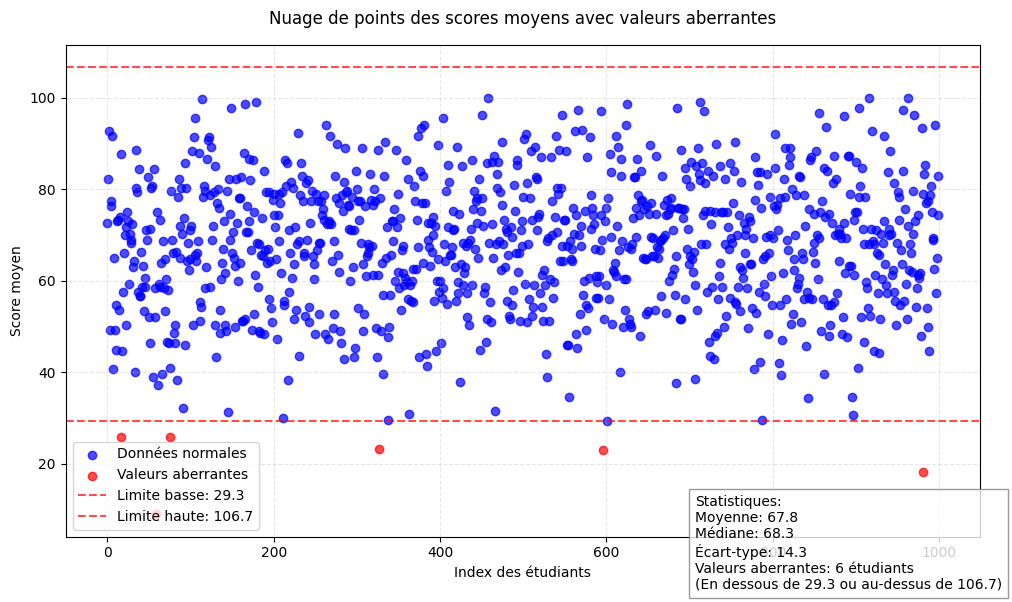


Détails des valeurs aberrantes :


ImportError: Missing optional dependency 'Jinja2'. DataFrame.style requires jinja2. Use pip or conda to install Jinja2.

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcul de l'IQR pour le score moyen
Q1 = df['average_score'].quantile(0.25)
Q3 = df['average_score'].quantile(0.75)
IQR = Q3 - Q1

# Définir les limites pour les valeurs aberrantes
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifier les valeurs aberrantes
outliers = df[(df['average_score'] < lower_bound) | (df['average_score'] > upper_bound)]

# Afficher les statistiques
print(f"Limite inférieure : {lower_bound:.2f}")
print(f"Limite supérieure : {upper_bound:.2f}")
print(f"\nNombre de valeurs aberrantes : {len(outliers)}")

plt.figure(figsize=(10, 6))

# Créer un nuage de points avec les données normales
normal_data = df[(df['average_score'] >= lower_bound) & (df['average_score'] <= upper_bound)]
plt.scatter(x=normal_data.index, y=normal_data['average_score'], 
            color='blue', alpha=0.7, label='Données normales')

# Mettre en évidence les valeurs aberrantes
if not outliers.empty:
    plt.scatter(x=outliers.index, y=outliers['average_score'], 
                color='red', alpha=0.7, label='Valeurs aberrantes')

# Ajouter les lignes de seuil
plt.axhline(y=lower_bound, color='r', linestyle='--', alpha=0.7, 
            label=f'Limite basse: {lower_bound:.1f}')
plt.axhline(y=upper_bound, color='r', linestyle='--', alpha=0.7, 
            label=f'Limite haute: {upper_bound:.1f}')

# Personnalisation du graphique
plt.title('Nuage de points des scores moyens avec valeurs aberrantes', pad=15)
plt.xlabel('Index des étudiants')
plt.ylabel('Score moyen')
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()

# Afficher les statistiques dans un encadré
stats_text = f"""Statistiques:
Moyenne: {df['average_score'].mean():.1f}
Médiane: {df['average_score'].median():.1f}
Écart-type: {df['average_score'].std():.1f}
Valeurs aberrantes: {len(outliers)} étudiants
(En dessous de {lower_bound:.1f} ou au-dessus de {upper_bound:.1f})"""

plt.figtext(0.7, 0.01, stats_text, 
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))
plt.tight_layout()
plt.show()

# Afficher le tableau des valeurs aberrantes
if not outliers.empty:
    print("\nDétails des valeurs aberrantes :")
    display(outliers[['gender', 'race/ethnicity', 'math score', 
                     'reading score', 'writing score', 'average_score']]
            .sort_values('average_score')
            .style.background_gradient(subset=['average_score'], cmap='Reds'))
else:
    print("Aucune valeur aberrante détectée.")

### 🔹 3. Visualisation des données

a. Histogramme des notes moyennes

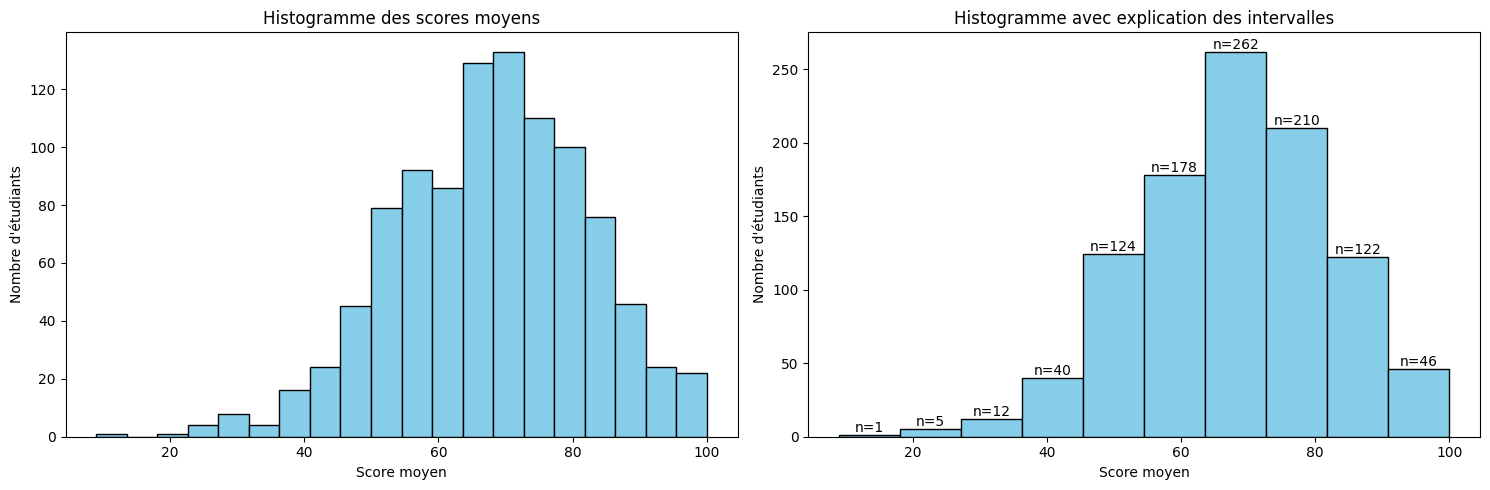


Explication de l'histogramme :
- Chaque barre représente un intervalle de scores
- La hauteur de chaque barre indique combien d'étudiants ont un score dans cet intervalle

Par exemple :
Entre 9.0 et 18.1 points : 1 étudiants
Entre 18.1 et 27.2 points : 5 étudiants
Entre 27.2 et 36.3 points : 12 étudiants
Entre 36.3 et 45.4 points : 40 étudiants
Entre 45.4 et 54.5 points : 124 étudiants
Entre 54.5 et 63.6 points : 178 étudiants
Entre 63.6 et 72.7 points : 262 étudiants
Entre 72.7 et 81.8 points : 210 étudiants
Entre 81.8 et 90.9 points : 122 étudiants
Entre 90.9 et 100.0 points : 46 étudiants


In [ ]:
# Créer plusieurs visualisations pour mieux comprendre l'histogramme
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# 1. Histogramme simple
ax1.hist(df['average_score'], bins=20, color='skyblue', edgecolor='black')
ax1.set_title('Histogramme des scores moyens')
ax1.set_xlabel('Score moyen')
ax1.set_ylabel('Nombre d\'étudiants')

# 2. Même histogramme avec explication des bins
hist, bins, _ = ax2.hist(df['average_score'], bins=10, color='skyblue', edgecolor='black')
ax2.set_title('Histogramme avec explication des intervalles')
ax2.set_xlabel('Score moyen')
ax2.set_ylabel('Nombre d\'étudiants')

# Ajouter des annotations pour expliquer
for i in range(len(hist)):
    center = (bins[i] + bins[i+1]) / 2
    ax2.text(center, hist[i], f'n={int(hist[i])}', 
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Afficher quelques statistiques pour mieux comprendre
print("\nExplication de l'histogramme :")
print(f"- Chaque barre représente un intervalle de scores")
print(f"- La hauteur de chaque barre indique combien d'étudiants ont un score dans cet intervalle")
print(f"\nPar exemple :")
for i in range(len(hist)):
    print(f"Entre {bins[i]:.1f} et {bins[i+1]:.1f} points : {int(hist[i])} étudiants")

b. Peut-on voir sur cet histogramme des valeurs abérrantes?

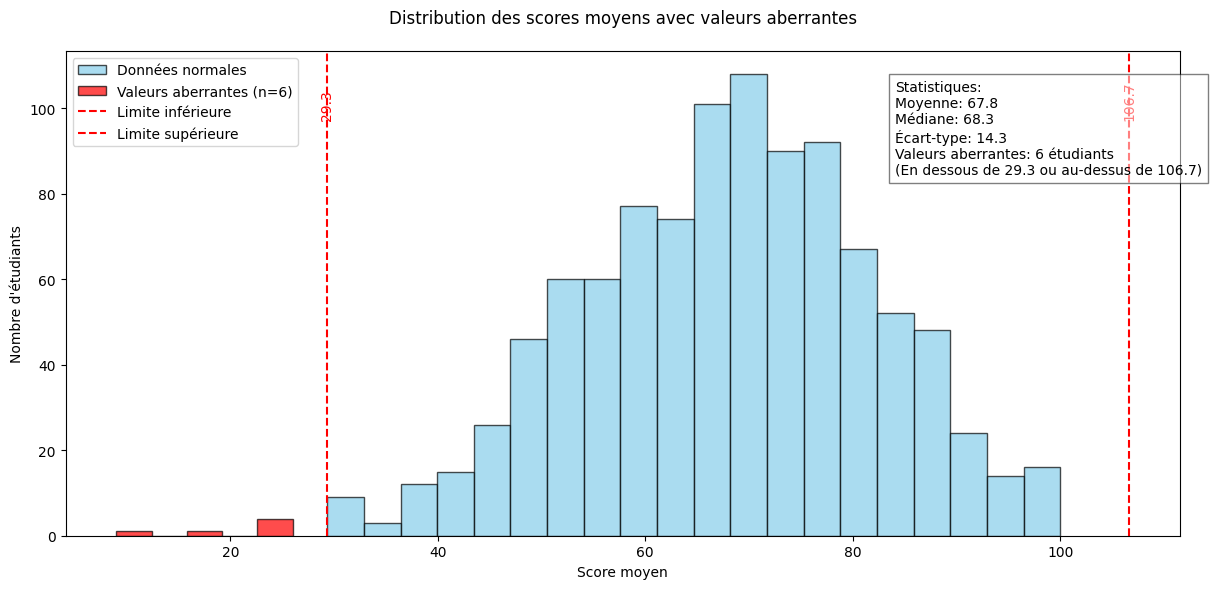

In [ ]:
# Calcul des quartiles et de l'IQR
Q1 = df['average_score'].quantile(0.25)
Q3 = df['average_score'].quantile(0.75)
IQR = Q3 - Q1

# Définition des seuils pour les valeurs aberrantes
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Séparation des données normales et aberrantes
normal_data = df[(df['average_score'] >= lower_bound) & (df['average_score'] <= upper_bound)]['average_score']
outliers = df[(df['average_score'] < lower_bound) | (df['average_score'] > upper_bound)]['average_score']

# Création de la figure
plt.figure(figsize=(12, 6))

# Tracé de l'histogramme des données normales
n, bins, patches = plt.hist(normal_data, bins=20, color='skyblue', edgecolor='black', alpha=0.7, 
                           label='Données normales')

# Tracé des valeurs aberrantes en rouge
if not outliers.empty:
    # On ajoute une barre rouge au début et à la fin de l'histogramme
    plt.hist(outliers, bins=5, color='red', edgecolor='black', alpha=0.7, 
             label=f'Valeurs aberrantes (n={len(outliers)})')
    
    # Ajout de lignes verticales pour les limites
    plt.axvline(x=lower_bound, color='r', linestyle='--', label='Limite inférieure')
    plt.axvline(x=upper_bound, color='r', linestyle='--', label='Limite supérieure')
    
    # Ajout d'annotations pour les valeurs limites
    plt.text(lower_bound, max(n)*0.9, f'{lower_bound:.1f}', 
             ha='center', va='bottom', color='red', rotation=90)
    plt.text(upper_bound, max(n)*0.9, f'{upper_bound:.1f}', 
             ha='center', va='bottom', color='red', rotation=90)

# Personnalisation du graphique
plt.title('Distribution des scores moyens avec valeurs aberrantes', pad=20)
plt.xlabel('Score moyen')
plt.ylabel('Nombre d\'étudiants')
plt.legend()

# Affichage des statistiques
stats_text = f"""Statistiques:
Moyenne: {df['average_score'].mean():.1f}
Médiane: {df['average_score'].median():.1f}
Écart-type: {df['average_score'].std():.1f}
Valeurs aberrantes: {len(outliers)} étudiants
(En dessous de {lower_bound:.1f} ou au-dessus de {upper_bound:.1f})"""

plt.figtext(0.75, 0.7, stats_text, bbox=dict(facecolor='white', alpha=0.5))
plt.tight_layout()
plt.show()

c. Faire une boxplot des moyennes par genre.

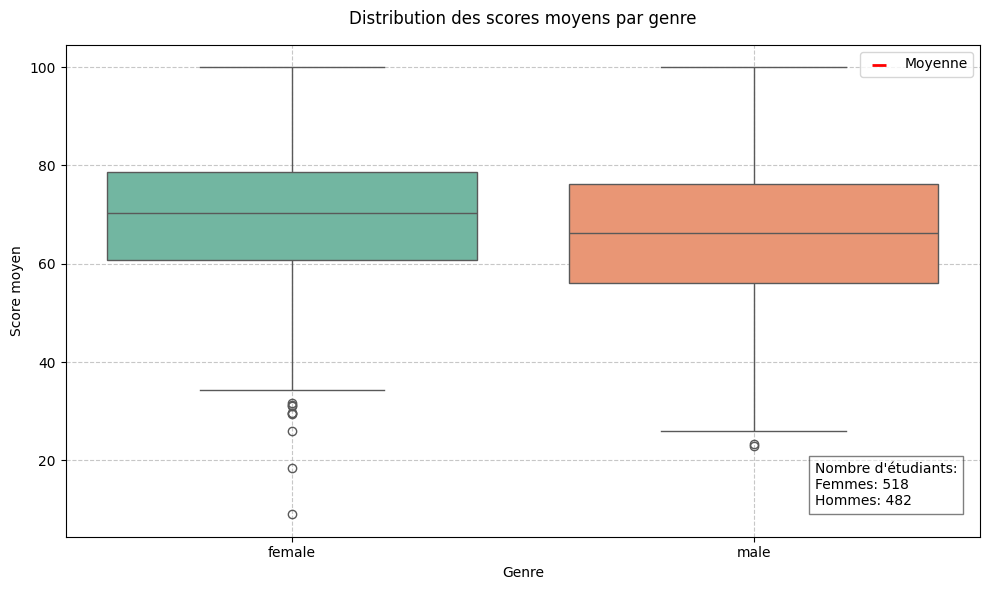

In [ ]:
plt.figure(figsize=(10, 6))

# Création du boxplot avec seaborn
sns.boxplot(x='gender', y='average_score', hue='gender', data=df, palette='Set2')

# Personnalisation du graphique
plt.title('Distribution des scores moyens par genre', pad=15)
plt.xlabel('Genre')
plt.ylabel('Score moyen')
plt.grid(True, linestyle='--', alpha=0.7)

# Ajout de la moyenne pour chaque genre
mean_values = df.groupby('gender')['average_score'].mean()
for i, gender in enumerate(mean_values.index):
    plt.scatter(i, mean_values[gender], color='red', s=100, marker='_', linewidth=2, 
               label='Moyenne' if i == 0 else "")

# Ajout de la légende
plt.legend()

# Affichage des statistiques
plt.figtext(0.82, 0.15, 
           f"Nombre d'étudiants:\n"
           f"Femmes: {len(df[df['gender']=='female'])}\n"
           f"Hommes: {len(df[df['gender']=='male'])}",
           bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()

d. Est-ce qu'il y a une différence nette des moyennes de genre sur ce boxplot? 

=== Statistiques descriptives ===
 Genre  Effectif   Moyenne   Médiane  Écart-type
Femmes       518 69.569498 70.333333   14.541809
Hommes       482 65.837483 66.333333   13.698840

Test de permutation (différence des moyennes):
Différence observée: 3.73
Valeur p: 0.0002

Conclusion: Il y a une différence statistiquement significative entre les moyennes (p < 0.05)
Les femmes ont en moyenne un score significativement plus élevé.


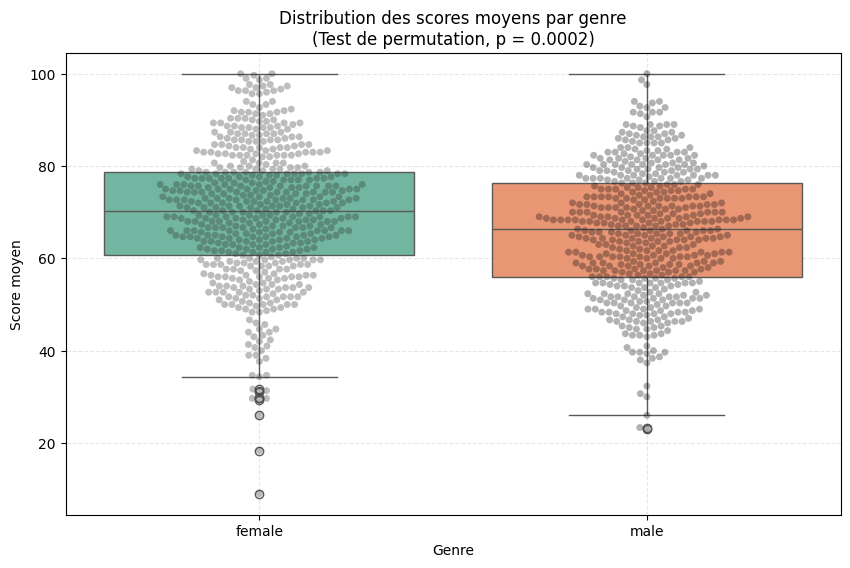

In [ ]:
import numpy as np

# Séparation des données par genre
female_scores = df[df['gender'] == 'female']['average_score']
male_scores = df[df['gender'] == 'male']['average_score']

# Calcul des statistiques descriptives
stats = pd.DataFrame({
    'Genre': ['Femmes', 'Hommes'],
    'Effectif': [len(female_scores), len(male_scores)],
    'Moyenne': [female_scores.mean(), male_scores.mean()],
    'Médiane': [female_scores.median(), male_scores.median()],
    'Écart-type': [female_scores.std(), male_scores.std()]
})

print("=== Statistiques descriptives ===")
print(stats.to_string(index=False))

# Test de permutation (méthode non-paramétrique)
def permutation_test(x, y, n_permutations=10000):
    obs_diff = np.abs(x.mean() - y.mean())
    combined = np.concatenate([x, y])
    count = 0
    
    for _ in range(n_permutations):
        np.random.shuffle(combined)
        perm_x = combined[:len(x)]
        perm_y = combined[len(x):]
        perm_diff = np.abs(perm_x.mean() - perm_y.mean())
        if perm_diff >= obs_diff:
            count += 1
    
    return (count + 1) / (n_permutations + 1)  # +1 pour éviter p=0

# Calcul de la p-value
p_value = permutation_test(female_scores.values, male_scores.values)

# Affichage des résultats
print(f"\nTest de permutation (différence des moyennes):")
print(f"Différence observée: {female_scores.mean() - male_scores.mean():.2f}")
print(f"Valeur p: {p_value:.4f}")

if p_value < 0.05:
    print("\nConclusion: Il y a une différence statistiquement significative entre les moyennes (p < 0.05)")
    if female_scores.mean() > male_scores.mean():
        print("Les femmes ont en moyenne un score significativement plus élevé.")
    else:
        print("Les hommes ont en moyenne un score significativement plus élevé.")
else:
    print("\nConclusion: Il n'y a pas de différence statistiquement significative entre les moyennes (p ≥ 0.05)")

# Visualisation
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='average_score', hue='gender',data=df, palette='Set2')
sns.swarmplot(x='gender', y='average_score', hue='gender',data=df, palette='dark:black', alpha=0.3)
plt.title(f'Distribution des scores moyens par genre\n(Test de permutation, p = {p_value:.4f})')
plt.ylabel('Score moyen')
plt.xlabel('Genre')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

e. Barplot moyenne par niveau d'éducation des parents? Peut-on avoir des conclusions sur cette variable?

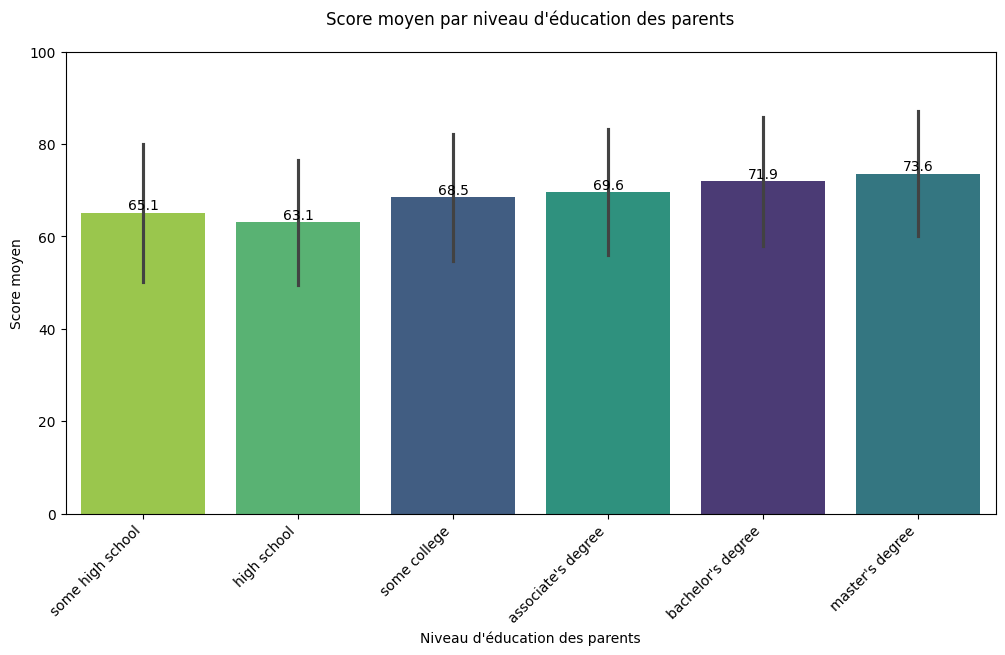

In [ ]:
# Créer une copie du DataFrame pour les calculs
df_edu = df.copy()

# Trier les niveaux d'éducation par ordre logique
education_order = [
    'some high school',
    'high school',
    'some college',
    "associate's degree",
    "bachelor's degree",
    "master's degree"
]

# Calculer les moyennes par niveau d'éducation
edu_means = df_edu.groupby('parental level of education')['average_score'].mean().sort_values()

# Créer la figure
plt.figure(figsize=(12, 6))

# Barplot
ax = sns.barplot(
    x='parental level of education',
    y='average_score',
    data=df_edu,
    order=education_order,
    errorbar='sd',
    hue='parental level of education',
    palette='viridis'
)

# Personnalisation du graphique
plt.xticks(rotation=45, ha='right')
plt.title('Score moyen par niveau d\'éducation des parents', pad=20)
plt.xlabel('Niveau d\'éducation des parents')
plt.ylabel('Score moyen')
plt.ylim(0, 100)  # Pour une meilleure échelle

# Ajouter les valeurs sur les barres
for i, p in enumerate(ax.patches):
    ax.annotate(f'{p.get_height():.1f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')


d. Faire le Heatmap de corrélation. Quelle est la variable la plus correlée avec la note moyenne?

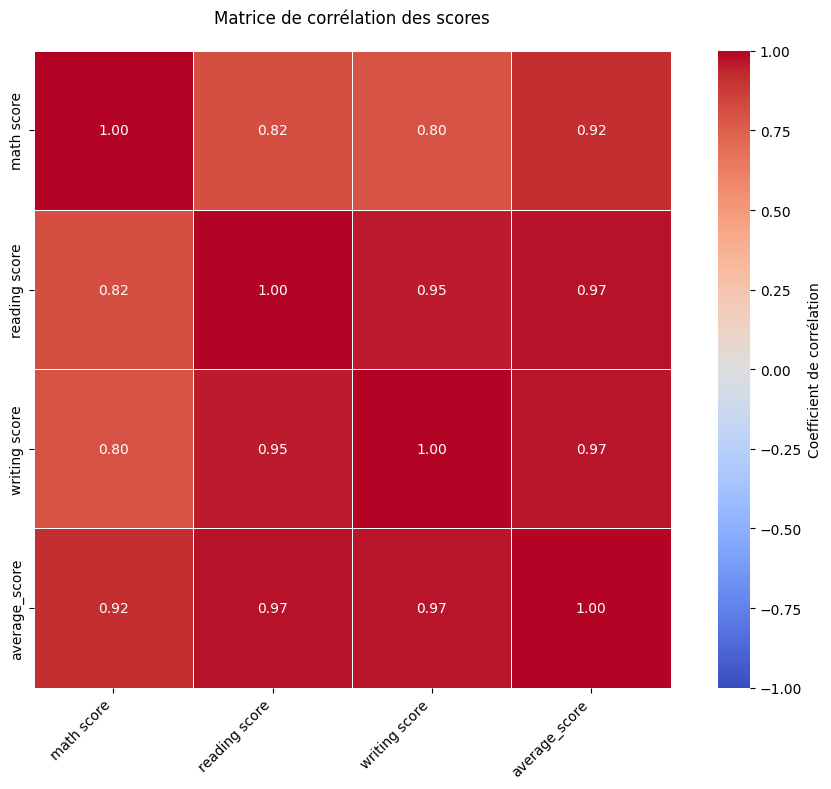

Corrélation avec la note moyenne (par ordre décroissant) :
- reading score: 0.970
- writing score: 0.966
- math score: 0.919

La variable la plus corrélée avec la note moyenne est : 'reading score' (r = 0.970)


In [ ]:
# Sélectionner uniquement les colonnes numériques
numeric_cols = ['math score', 'reading score', 'writing score', 'average_score']
corr_matrix = df[numeric_cols].corr()

# Créer la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,        # Afficher les valeurs dans les cases
    cmap='coolwarm',   # Dégradé de couleurs
    vmin=-1, vmax=1,   # Échelle de -1 à 1
    square=True,       # Cases carrées
    fmt='.2f',         # 2 décimales
    linewidths=0.5,    # Épaisseur des lignes
    cbar_kws={'label': 'Coefficient de corrélation'}
)

plt.title('Matrice de corrélation des scores', pad=20)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

numeric_cols_with_average = ['math score', 'reading score', 'writing score']
correlations = df[numeric_cols_with_average].corrwith(df['average_score']).abs()

# Trier par ordre décroissant
correlations_sorted = correlations.sort_values(ascending=False)

# Afficher les résultats
print("Corrélation avec la note moyenne (par ordre décroissant) :")
for variable, corr in correlations_sorted.items():
    print(f"- {variable}: {corr:.3f}")

# Afficher la variable la plus corrélée
print(f"\nLa variable la plus corrélée avec la note moyenne est : '{correlations_sorted.index[0]}' (r = {correlations_sorted.iloc[0]:.3f})")

### 🔹 4. Nettoyage des données

a. Imputation des NaN (remplacer les NaN par la moyenne de la variable correspondante)

In [ ]:
print("Valeurs manquantes avant le nettoyage :")
print(df.isnull().sum())

df_copy = df.copy()

numeric_cols = ['math score', 'reading score', 'writing score']
for col in numeric_cols:
    if df_copy[col].isnull().any():
        mean_val = df_copy[col].mean()
        df_copy[col].fillna(mean_val, inplace=True)

print("\nValeurs manquantes après le nettoyage :")
print(df_copy.isnull().sum())

Valeurs manquantes avant le nettoyage :
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
average_score                  0
dtype: int64

Valeurs manquantes après le nettoyage :
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
average_score                  0
dtype: int64


b. Suppression des colonnes inutiles ( Identifiez les colonnes qui sont redondantes, constantes ou sans valeur explicative[aucune corrélation] )

Colonnes constantes (même valeur partout) : []

Colonnes avec plus de 50% de valeurs manquantes : []
Colonne redondante : writing score (fortement corrélée avec reading score)
Colonne redondante : average_score (fortement corrélée avec reading score)
Colonne redondante : average_score (fortement corrélée avec writing score)

Colonnes avec faible corrélation avec la cible : []

=== Rapport de nettoyage ===
Colonnes initiales : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score', 'average_score']
Colonnes supprimées : ['writing score', 'average_score']
Colonnes conservées : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score']

Taille initiale : (1000, 9)
Taille après nettoyage : (1000, 7)


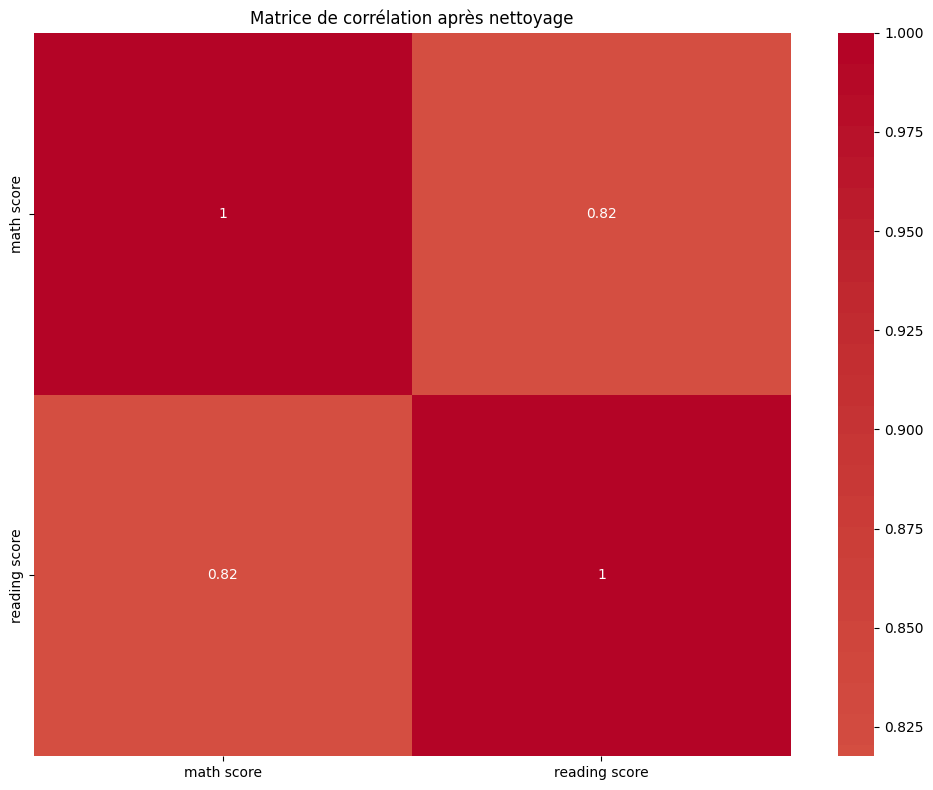

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score
0,female,group B,bachelor's degree,standard,none,72,72
1,female,group C,some college,standard,completed,69,90
2,female,group B,master's degree,standard,none,90,95
3,male,group A,associate's degree,free/reduced,none,47,57
4,male,group C,some college,standard,none,76,78
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99
996,male,group C,high school,free/reduced,none,62,55
997,female,group C,high school,free/reduced,completed,59,71
998,female,group D,some college,standard,completed,68,78


In [ ]:
# 1. Créer une copie du DataFrame
df_cleaned = df.copy()

# 2. Identifier les colonnes avec une seule valeur unique
constant_columns = [col for col in df_cleaned.columns if df_cleaned[col].nunique() == 1]
print("Colonnes constantes (même valeur partout) :", constant_columns)

# 3. Identifier les colonnes avec un taux de valeurs manquantes élevé (>50%)
missing_ratio = df_cleaned.isnull().mean()
high_missing_columns = list(missing_ratio[missing_ratio > 0.5].index)
print("\nColonnes avec plus de 50% de valeurs manquantes :", high_missing_columns)

# 4. Identifier les colonnes redondantes (forte corrélation)
# Calculer la matrice de corrélation
corr_matrix = df_cleaned.select_dtypes(include=['float64', 'int64']).corr().abs()

# Trouver les paires de colonnes avec une corrélation > 0.95
redundant_columns = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.95:  # Seuil de corrélation
            colname = corr_matrix.columns[i]
            redundant_columns.add(colname)
            print(f"Colonne redondante : {colname} (fortement corrélée avec {corr_matrix.columns[j]})")

# 5. Identifier les colonnes avec peu de corrélation avec la cible (si applicable)
if 'average_score' in df_cleaned.columns:
    target_corr = df_cleaned.select_dtypes(include=['float64', 'int64']).corr()['average_score'].abs()
    low_corr_columns = target_corr[target_corr < 0.1].index.tolist()
    print("\nColonnes avec faible corrélation avec la cible :", low_corr_columns)
else:
    low_corr_columns = []

# 6. Combiner toutes les colonnes à supprimer
columns_to_drop = list(set(constant_columns + high_missing_columns + list(redundant_columns) + low_corr_columns))

# 7. Supprimer les colonnes inutiles
df_cleaned = df_cleaned.drop(columns=columns_to_drop, errors='ignore')

# 8. Afficher les résultats
print("\n=== Rapport de nettoyage ===")
print(f"Colonnes initiales : {df.columns.tolist()}")
print(f"Colonnes supprimées : {columns_to_drop}")
print(f"Colonnes conservées : {df_cleaned.columns.tolist()}")
print(f"\nTaille initiale : {df.shape}")
print(f"Taille après nettoyage : {df_cleaned.shape}")

# 9. Visualisation des corrélations des colonnes conservées
if len(df_cleaned.select_dtypes(include=['float64', 'int64']).columns) > 1:
    plt.figure(figsize=(10, 8))
    sns.heatmap(df_cleaned.select_dtypes(include=['float64', 'int64']).corr(), 
                annot=True, cmap='coolwarm', center=0)
    plt.title('Matrice de corrélation après nettoyage')
    plt.tight_layout()
    plt.show()

# 10. Retourner le DataFrame nettoyé
df_cleaned

c. Sélection des colonnes utiles

### 🔹 5. Encodage

a. Encodage de `gender` ( rendre en numérqieu de façon catégorielle )

In [12]:
df_encoded = df.copy()

df_encoded['gender_encoded'] = df_encoded['gender'].map({'female': 0, 'male': 1})

df_encoded = df_encoded.drop(columns=['gender'])

df_encoded

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score,gender_encoded
0,group B,bachelor's degree,standard,none,72,72,74,72.666667,0
1,group C,some college,standard,completed,69,90,88,82.333333,0
2,group B,master's degree,standard,none,90,95,93,92.666667,0
3,group A,associate's degree,free/reduced,none,47,57,44,49.333333,1
4,group C,some college,standard,none,76,78,75,76.333333,1
...,...,...,...,...,...,...,...,...,...
995,group E,master's degree,standard,completed,88,99,95,94.000000,0
996,group C,high school,free/reduced,none,62,55,55,57.333333,1
997,group C,high school,free/reduced,completed,59,71,65,65.000000,0
998,group D,some college,standard,completed,68,78,77,74.333333,0


b. Encodage one-hot de `parental_level_of_education`

In [16]:
education_dummies = pd.get_dummies(
    df['parental level of education'],
    prefix='parent_edu',  # Préfixe pour les nouvelles colonnes
    drop_first=False,     # Garder toutes les colonnes
    dtype='int8'          # Utiliser int8 pour économiser de l'espace
)

df_encoded = pd.concat([df, education_dummies], axis=1)

# Afficher les nouvelles colonnes
print("\nNouvelles colonnes créées :")
print(education_dummies.columns.tolist())

print("\nVérification de l'encodage :")
display(df_encoded.head(10))


Nouvelles colonnes créées :
["parent_edu_associate's degree", "parent_edu_bachelor's degree", 'parent_edu_high school', "parent_edu_master's degree", 'parent_edu_some college', 'parent_edu_some high school']

Vérification de l'encodage :


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score,parent_edu_associate's degree,parent_edu_bachelor's degree,parent_edu_high school,parent_edu_master's degree,parent_edu_some college,parent_edu_some high school
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,0,1,0,0,0,0
1,female,group C,some college,standard,completed,69,90,88,82.333333,0,0,0,0,1,0
2,female,group B,master's degree,standard,none,90,95,93,92.666667,0,0,0,1,0,0
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,1,0,0,0,0,0
4,male,group C,some college,standard,none,76,78,75,76.333333,0,0,0,0,1,0
5,female,group B,associate's degree,standard,none,71,83,78,77.333333,1,0,0,0,0,0
6,female,group B,some college,standard,completed,88,95,92,91.666667,0,0,0,0,1,0
7,male,group B,some college,free/reduced,none,40,43,39,40.666667,0,0,0,0,1,0
8,male,group D,high school,free/reduced,completed,64,64,67,65.000000,0,0,1,0,0,0
9,female,group B,high school,free/reduced,none,38,60,50,49.333333,0,0,1,0,0,0


c. Est-il utilise pour l'encodage de `parental_level_of_education` de faire un Regroupement des modalités ? 

### 🔹 6. Préparation finale

a. Créer X (features) et y (cible: average_score)

b. Vérifier que X est bien numérique

c. Sauvegarder X et y

## 💡 Bonus

In [ ]:
# Fonction preprocess_students_data(df)

a. Visualisation libre d'une tendance surprenante